# Project CoronaVirus Brazil Dataset EDA (Exploratory Data Analysis)! Criado por Dr. Vagner Zeizer Carvalho Paes.

# Introdução

## Vamos usar um conjunto de dados do Kaggle que mostra as mortes em 2019 e 2020, mostrando a faixa de idade, causas, cor da pele, etc.
## O Objetivo é fazer uma análise do impacto da pandemia do Corona vírus sobre as mortes no Brasil, analisando como o total de mortes varia para cada idade, gênero, cor da pele, etc.

# Importando pacotes básicos do Python

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# lendo os dados

In [2]:
data = pd.read_csv('death_cause_brazil.csv',parse_dates=True)


In [3]:
data.head()

,date,state,gender,age,color,cause,total
0,2020-01-01,AC,F,60 - 69,East asian,Septicemia,1
1,2019-01-01,AC,F,80 - 89,White,Hearth attack,1
2,2019-01-01,AC,F,30 - 39,Indigenous,Others,1
3,2019-01-01,AC,F,70 - 79,Mixed,Cardiogenic shock,1
4,2020-01-01,AC,F,70 - 79,Mixed,Pneumonia,1


# como tem uma coluna que corresponde a data, temos uma série temporal (Time Series).

In [4]:
data['date']=pd.to_datetime(data['date'])

# Analisando informações sobre o conjunto de dados

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098241 entries, 0 to 1098240
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1098241 non-null  datetime64[ns]
 1   state   1098241 non-null  object        
 2   gender  1098241 non-null  object        
 3   age     1098241 non-null  object        
 4   color   1098241 non-null  object        
 5   cause   1098241 non-null  object        
 6   total   1098241 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 58.7+ MB


# os tipos das variáveis estão ok

# Temos seis colunas no conjunto de dados!
## a saber <em> data, estado, genêro, idade, cor, causa e total </em>

# Analisando a consistência dos dados

## procurando por dados duplicados

In [6]:
data.duplicated().sum()

0

# -> não há dados duplicados

In [7]:
data.isnull().sum()

date      0
state     0
gender    0
age       0
color     0
cause     0
total     0
dtype: int64

## tipos das variáveis!

In [8]:
data.dtypes

date      datetime64[ns]
state             object
gender            object
age               object
color             object
cause             object
total              int64
dtype: object

# -> não há problema nos dados

## as colunas dos dados são

In [9]:
data.columns

Index(['date', 'state', 'gender', 'age', 'color', 'cause', 'total'], dtype='object')

# Quantos estados temos?

In [10]:
len(data.state.unique())

27

In [11]:
data.state.unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

# -> 26 estados e o distrito federal. Está OK.

## para o gênero

In [12]:
data.gender.unique()

array(['F', 'M'], dtype=object)

# Masculino e Feminino. OK.

In [13]:
data.age.unique()

array(['60 - 69', '80 - 89', '30 - 39', '70 - 79', '< 9', '40 - 49',
       '50 - 59', '> 100', '10 - 19', '20 - 29', '90 - 99', 'N/I'],
      dtype=object)

# Temos várias faixas etárias. Há uma não informada (N/I).

# garantindo que a idade é do tipo string

In [14]:
data.age=data.age.astype('str')

# mudando um pouco a classificação das faixas etárias para fazer gráficos melhores.

In [15]:
data.age=data.age.replace({'> 100':'99+', '< 9':'0-9'})

In [16]:
data.age.unique()

array(['60 - 69', '80 - 89', '30 - 39', '70 - 79', '0-9', '40 - 49',
       '50 - 59', '99+', '10 - 19', '20 - 29', '90 - 99', 'N/I'],
      dtype=object)

## -> OK!

## para a cor da pele da pessoa

In [17]:
data.color.unique()

array(['East asian', 'White', 'Indigenous', 'Mixed', 'Ignored', 'Black'],
      dtype=object)

# temos cinco categorias e uma chamada "ignored"?!

## as causas de morte

In [18]:
data.cause.unique()

array(['Septicemia', 'Hearth attack', 'Others', 'Cardiogenic shock',
       'Pneumonia', 'Stroke', 'Undetermined', 'Respiratory failure',
       'Cardiopathy', 'Sudden death', 'Sars', 'Covid', 'Covid (stroke)',
       'Covid (hearth attack)', 'Unknown'], dtype=object)

In [19]:
len(data.cause.unique())

15

# temos 13 causas de morte, sendo que existem tb 'Undetermined' e 'Unknown'.
# há morte por covid de três formas: covid "por si só", derrame e ataque cardíaco.

# -> há uma alta chance de que as mortes por pneumonia e falha respiratória em 2020 estejam mascarando mais mortes por covid.

# analisando o máximo de mortes que pode ocorrer por dia (lembrar que para um dado estado, a morte pode ocorrer por mais causas)

In [20]:
data.total.unique()

array([ 1,  2,  3,  4,  6, 11,  7,  8,  5,  9, 12, 14, 10, 13, 16, 15, 23,
       17, 21, 18, 19, 24, 27, 20, 26, 32, 22, 25, 28, 30, 29, 36, 31, 34,
       35, 33, 38, 37, 41, 40, 43])

# máximo de 43 mortos por uma causa e mínimo de 1. 

# Análise da série temporal entre o começo do ano e 15 de novembro

In [21]:
data_2019=data[(data['date'] <= '2019-09-15') & (data['date'] > '2019-01-01') ]
data_2019=data_2019.groupby(['date']).sum()['total']
data_2019

data_2020=data[(data['date'] <= '2020-09-15') & (data['date'] > '2020-01-01')]
data_2020=data_2020.groupby(['date']).sum()['total']
data_2020



date
2020-01-02    3153
2020-01-03    3013
2020-01-04    2949
2020-01-05    2932
2020-01-06    3033
              ... 
2020-09-11    1673
2020-09-12    1492
2020-09-13    1244
2020-09-14     576
2020-09-15      81
Name: total, Length: 258, dtype: int64

In [22]:
data_2019

date
2019-01-02    3029
2019-01-03    3185
2019-01-04    3059
2019-01-05    2957
2019-01-06    2772
              ... 
2019-09-11    3366
2019-09-12    3252
2019-09-13    3286
2019-09-14    3224
2019-09-15    3222
Name: total, Length: 257, dtype: int64

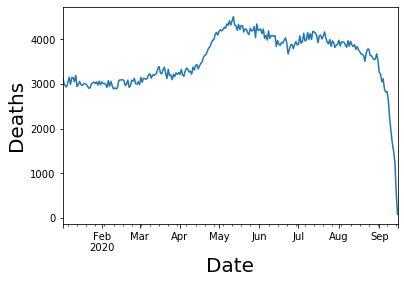

In [23]:
data_2020.plot()
plt.xlabel('Date',size=20)
plt.ylabel('Deaths',size=20)
plt.show()

## Em 2020, perto do dia 15 há uma queda significativa no número de mortes. Isso deve ser devido ao fato de que as mortes desses dias não foram contabilizadas porque os dados chegarão nos próximos dias.

# Vamos fazer um gráfico de como variaram as mortes para cada ano

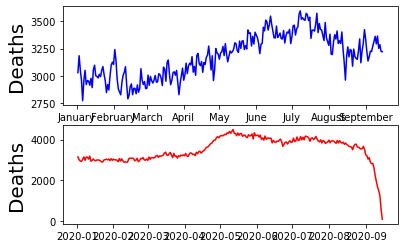

In [24]:
import matplotlib.dates as dates
fig,axs=plt.subplots(2)
axs[0].plot(data_2019,color='blue')
axs[1].plot(data_2020,color='red')

#
axs[0].xaxis.set_major_locator(dates.MonthLocator())
axs[0].set_xticklabels(pd.date_range(start='2019-01-01', freq='M', periods=12).month_name())
axs[0].set_ylabel('Deaths',size=20)
axs[1].xaxis.set_major_locator(dates.MonthLocator())
axs[1].set_ylabel('Deaths',size=20)

plt.show()

## O perfil temporal de mortes é bem diferente

# Vamos fazer uma comparação agora pela idade

In [25]:

data_2019=data[(data['date'] <= '2019-09-15') & (data['date'] >= '2019-01-01')]
data_2020=data[(data['date'] <= '2020-09-15') & (data['date'] >= '2020-01-01')]

plt.figure(figsize=[8,6])
grouped_age=data_2019.groupby(['age'])['total'].sum()
grouped_age_2020=data_2020.groupby(['age'])['total'].sum()


<Figure size 576x432 with 0 Axes>

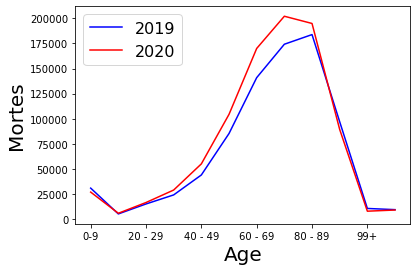

In [26]:
grouped_age.plot(color='blue',label='2019')
grouped_age_2020.plot(color='red',label='2020')

plt.legend(fontsize=16)
plt.xlabel('Age',size=20)
plt.ylabel('Mortes',size=20)
plt.show()

# claramente há um aumento significativo nas mortes principalmente entre 50-59 a 70-79 anos

# Analisando agora por estado

In [27]:
#plt.figure(figsize=[8,6])
grouped_state=data_2019.groupby(['state'])['total'].sum()
grouped_state_2020=data_2020.groupby(['state'])['total'].sum()


In [28]:
df_2020=pd.DataFrame(grouped_state_2020)
df_2019=pd.DataFrame(grouped_state)

In [29]:
df_2019

,total
state,
AC,2325
AL,10655
AM,9086
AP,1687
BA,44890
CE,26910
DF,9920
ES,16455
GO,20812


In [30]:
df_2019=df_2019.rename(columns={'total':'total_mortes_2019'})
df_2020=df_2020.rename(columns={'total':'total_mortes_2020'})


In [31]:
df_total=df_2019.merge(df_2020,how='left',on='state')

In [32]:
len(df_total)

27

# Primeiro colocando em um gráfico para 14 estados para não ficar muito denso

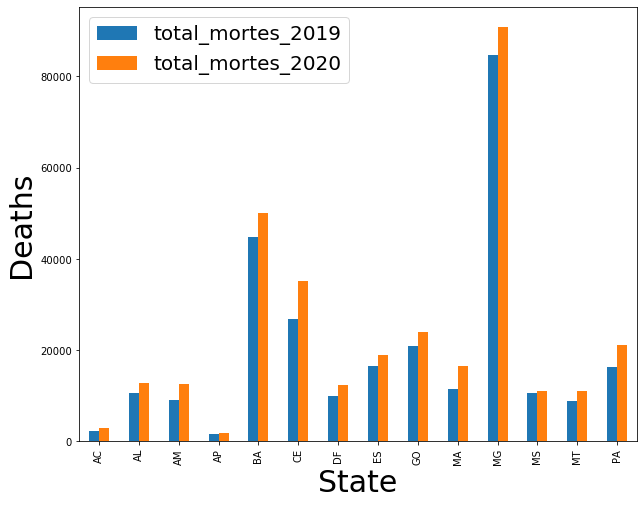

In [33]:

fig,ax=plt.subplots(1,figsize=[10,8])
#plt.figure(figsize=[100,8])
#df_total['total2019'].value_counts().plot(kind='bar',color='black',ax=ax)
#grouped_state_2020.plot(kind='bar',color='red',ax=ax)
df_total[:14].plot(kind='bar',ax=ax)
plt.legend(fontsize=20)
#plt.xticks(grouped_state)
plt.xlabel('State',size=30)
plt.ylabel('Deaths',size=30)
plt.show()


# Agora para os 13 restantes

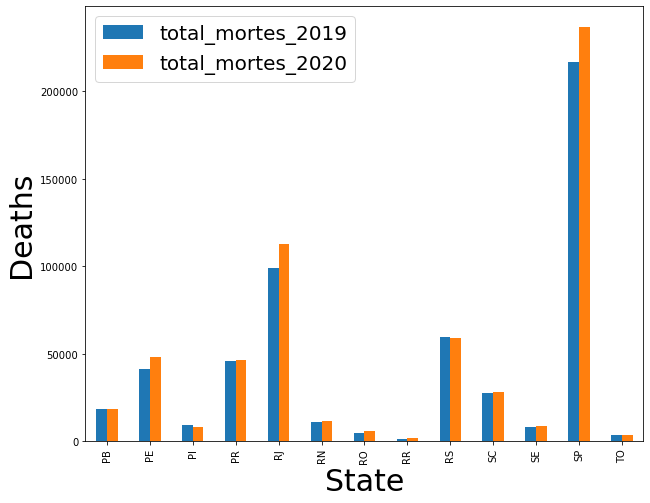

In [34]:
fig,ax=plt.subplots(1,figsize=[10,8])
#plt.figure(figsize=[100,8])
#df_total['total2019'].value_counts().plot(kind='bar',color='black',ax=ax)
#grouped_state_2020.plot(kind='bar',color='red',ax=ax)
df_total[14:].plot(kind='bar',ax=ax)
plt.legend(fontsize=20)
plt.xlabel('State',size=30)
plt.ylabel('Deaths',size=30)
#plt.xticks(grouped_state)
plt.show()


## claramente em muitos estados houve um aumento de mortes, mas em alguns o aumento foi pequeno. Vamos analisar a variação relativa a 2019 no mesmo período.

In [35]:
df_2020_state=pd.DataFrame(grouped_state_2020)
df_2019_state=pd.DataFrame(grouped_state)


In [36]:
df_2019_state=df_2019_state.rename(columns={'total':'total_mortes_estado_2019'})
df_2020_state=df_2020_state.rename(columns={'total':'total_mortes_estado_2020'})


In [37]:
df_total_state=df_2019_state.merge(df_2020_state,how='left',on='state')

In [38]:
df_total_state['variacao_mortes_state']=(df_total_state['total_mortes_estado_2020']-df_total_state['total_mortes_estado_2019'])/df_total_state['total_mortes_estado_2019']*100

## 14 estados primeiramente

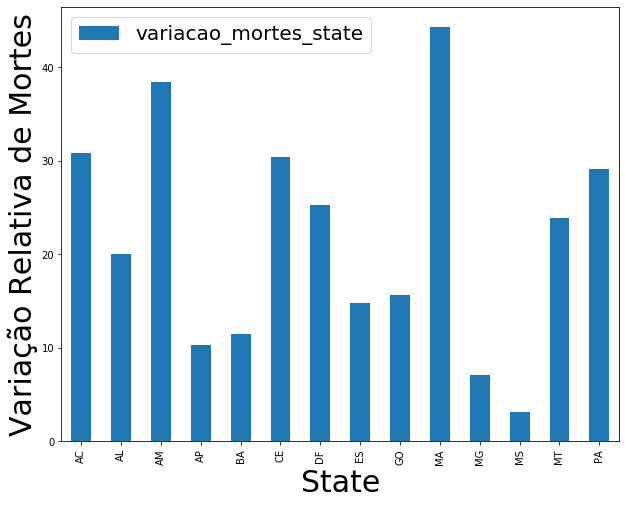

In [39]:

fig,ax=plt.subplots(1,figsize=[10,8])
#plt.figure(figsize=[100,8])
#df_total['total2019'].value_counts().plot(kind='bar',color='black',ax=ax)
#grouped_state_2020.plot(kind='bar',color='red',ax=ax)
df_total_state['variacao_mortes_state'][:14].plot(kind='bar',ax=ax)
plt.legend(fontsize=20)
#plt.xticks(grouped_state)
plt.xlabel('State',size=30)
plt.ylabel('Variação Relativa de Mortes',size=30)
plt.show()


## 13 estados restantes

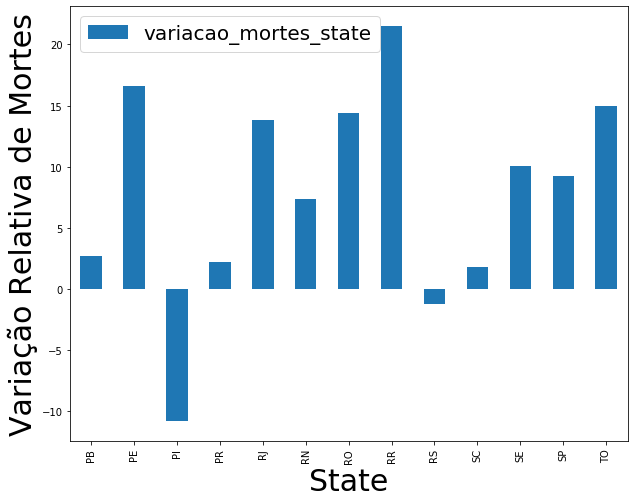

In [40]:

fig,ax=plt.subplots(1,figsize=[10,8])
#plt.figure(figsize=[100,8])
#df_total['total2019'].value_counts().plot(kind='bar',color='black',ax=ax)
#grouped_state_2020.plot(kind='bar',color='red',ax=ax)
df_total_state['variacao_mortes_state'][14:].plot(kind='bar',ax=ax)
plt.legend(fontsize=20)
#plt.xticks(grouped_state)
plt.xlabel('State',size=30)
plt.ylabel('Variação Relativa de Mortes',size=30)
plt.show()


## estados como PI e RS, surpreendentemente, apresentaram queda relativa nas mortes. Estados como PR, SC e MS apresentaram um aumento menor do que 5% nas mortes.  Em contrapartida, estados como AM, MA apresentaram aumento de cerca de 40%, seguidos por AC, CE e PA com 30%.

# Analisando agora o total de mortes por etnia

In [41]:
grouped_color=data_2019.groupby(['color'])['total'].sum()
grouped_color_2020=data_2020.groupby(['color'])['total'].sum()

df_2020_color=pd.DataFrame(grouped_color_2020)
df_2019_color=pd.DataFrame(grouped_color)


In [42]:
df_2019_color=df_2019_color.rename(columns={'total':'total_mortes_2019'})
df_2020_color=df_2020_color.rename(columns={'total':'total_mortes_2020'})


In [43]:
df_total_color=df_2019_color.merge(df_2020_color,how='left',on='color')

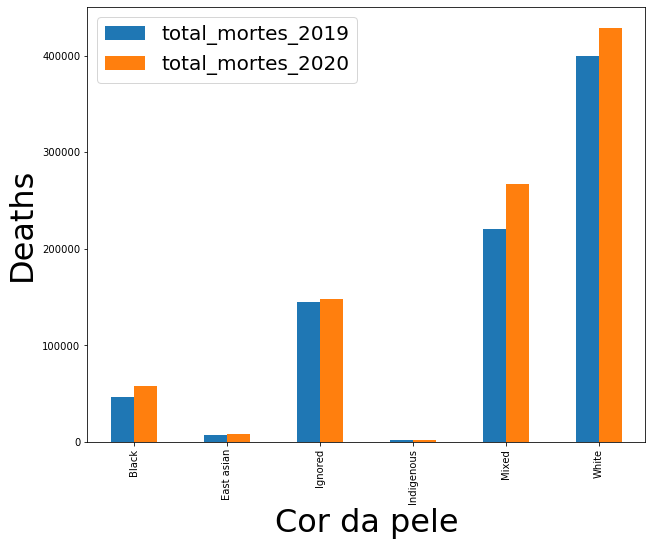

In [44]:
fig,ax=plt.subplots(1,figsize=[10,8])
#plt.figure(figsize=[100,8])
#df_total['total2019'].value_counts().plot(kind='bar',color='black',ax=ax)
#grouped_state_2020.plot(kind='bar',color='red',ax=ax)
df_total_color.plot(kind='bar',ax=ax)

#plt.xticks(grouped_state)
plt.legend(fontsize=20)

plt.xlabel('Cor da pele',size=32)
plt.ylabel('Deaths',size=32)

plt.show()


# aparentemente houveram aumentos. Mas vamos analisar relativamente a 2019 essas mortes

In [45]:
df_total_color['aumento_mortes_color']=(df_total_color['total_mortes_2020']-df_total_color['total_mortes_2019'])/df_total_color['total_mortes_2019']*100

In [46]:
df_total_color

,total_mortes_2019,total_mortes_2020,aumento_mortes_color
color,,,
Black,46888,58214,24.155434
East asian,7190,7855,9.248957
Ignored,144845,147435,1.788118
Indigenous,1451,1747,20.399724
Mixed,220815,266856,20.850486
White,399633,429029,7.355749


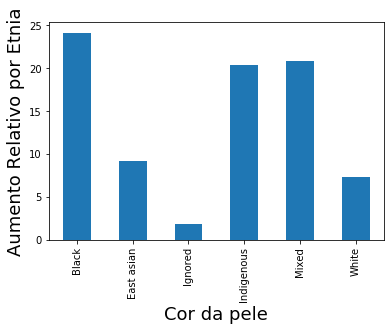

In [47]:

df_total_color['aumento_mortes_color'].plot(kind='bar')
plt.xlabel('Cor da pele',size=18)
plt.ylabel('Aumento Relativo por Etnia',size=18)

plt.show()


## a partir da análise acima fica evidente que negros e indígenas foram muito mais afetados pela pandemia.

# Fazendo a análise agora por causa de morte

In [48]:
grouped_cause=data_2019.groupby(['cause'])['total'].sum()
grouped_cause_2020=data_2020.groupby(['cause'])['total'].sum()

df_2020_cause=pd.DataFrame(grouped_cause_2020)
df_2019_cause=pd.DataFrame(grouped_cause)


In [49]:
df_2019_cause=df_2019_cause.rename(columns={'total':'total_mortes_2019_causa'})
df_2020_cause=df_2020_cause.rename(columns={'total':'total_mortes_2020_causa'})



In [50]:
df_total_cause=df_2019_cause.merge(df_2020_cause,how='right',on='cause')

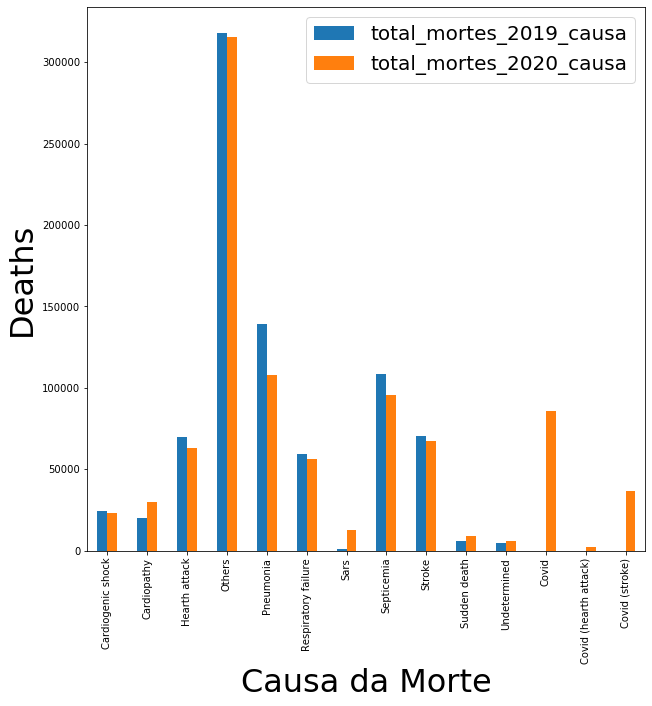

In [51]:
fig,ax=plt.subplots(1,figsize=[10,10])
#plt.figure(figsize=[100,8])
#df_total['total2019'].value_counts().plot(kind='bar',color='black',ax=ax)
#grouped_state_2020.plot(kind='bar',color='red',ax=ax)
df_total_cause.plot(kind='bar',ax=ax)
plt.legend(fontsize=20)

plt.xlabel('Causa da Morte',size=32)
plt.ylabel('Deaths',size=32)

#plt.xticks(grouped_state)
plt.show()

# algumas causas de morte diminuíram e outras aumentaram relativamente a 2019. Vale a pena fazer uma análise comparativa a 2019 para ver como a pandemia afetou as causas de mortes

In [52]:
df_total_cause['mortes_relativas_causa']=(df_2020_cause['total_mortes_2020_causa']-df_2019_cause['total_mortes_2019_causa'])/df_2019_cause['total_mortes_2019_causa']*100

## causas que houveram relativo aumento


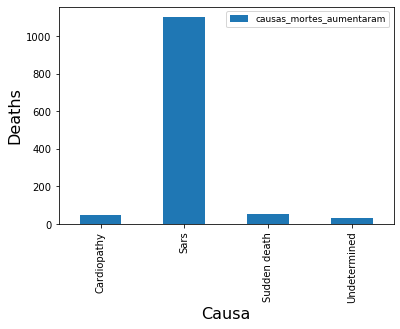

In [53]:
(df_total_cause['mortes_relativas_causa'][df_total_cause['mortes_relativas_causa']>0.]).plot(kind='bar',label='causas_mortes_aumentaram')

plt.legend(fontsize=9)
plt.xlabel('Causa',size=16)
plt.ylabel('Deaths',size=16)


plt.show()


# cardiopatia, morte súbita e causa indeterminada aumentaram bastante em relação a 2019, mas SARS aumentou mais de 1000%!!!! Com certeza, isso está mascarando mais mortes por covid!

## causas que houveram relativa diminuição

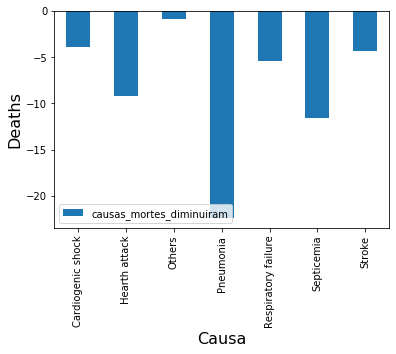

In [54]:

(df_total_cause['mortes_relativas_causa'][df_total_cause['mortes_relativas_causa']<0.]).plot(kind='bar',label='causas_mortes_diminuiram')
plt.legend()
plt.xlabel('Causa',size=16)
plt.ylabel('Deaths',size=16)
plt.show()

## diversas causa, como pneumonia, falha respiratória e derrame diminuíram em relação a 2019. Com certeza, isso mostra que as mortes por covid relatadas nesse ano podem estar relacionadas com suspostas mortes por essas causas

# Analisando por gênero

In [55]:
grouped_gender=data_2019.groupby(['gender'])['total'].sum()
grouped_gender_2020=data_2020.groupby(['gender'])['total'].sum()

df_2020_gender=pd.DataFrame(grouped_gender_2020)
df_2019_gender=pd.DataFrame(grouped_gender)


In [56]:
df_2019_gender=df_2019_gender.rename(columns={'total':'total_mortes_2019_genero'})
df_2020_gender=df_2020_gender.rename(columns={'total':'total_mortes_2020_genero'})



In [57]:
df_total_gender=df_2019_gender.merge(df_2020_gender,how='right',on='gender')

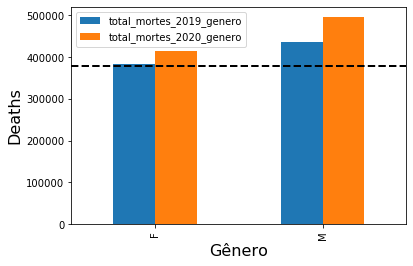

In [58]:
fig,ax=plt.subplots(1,figsize=[6,4])
#plt.figure(figsize=[100,8])
#df_total['total2019'].value_counts().plot(kind='bar',color='black',ax=ax)
#grouped_state_2020.plot(kind='bar',color='red',ax=ax)
df_total_gender.plot(kind='bar',ax=ax)
plt.axhline(380000,linestyle='--',linewidth=2,color='black')
#plt.xticks(grouped_state)

plt.xlabel('Gênero',size=16)
plt.ylabel('Deaths',size=16)


plt.show()

## claramente houve um aumento de mortes em homens e mulheres de 2019 para 2020 no mesmo período devido à pandemia. Vamos analisar isso percentualmente.

In [59]:
df_2020_gender


,total_mortes_2020_genero
gender,
F,415125
M,496011


In [60]:
df_2019_gender

,total_mortes_2019_genero
gender,
F,384267
M,436555


In [61]:
print('Masculino: {0}% de mortes a mais do que em 2019'.format(((496011-436555)/436555)*100))
print('Feminino: {0}% de mortes a mais do que em 2019'.format(((415125-384267)/436555)*100))


Masculino: 13.619360676203456% de mortes a mais do que em 2019
Feminino: 7.068525157196688% de mortes a mais do que em 2019


# Conclusões

# Foi feita uma análise exploratória de dados de mortes relatadas no Brasil no mesmo período de 2019 e 2020. Houve um aumento significativo na morte de brasileiros, sendo que no período de estudo morreram 13% a mais de homens e 7% a mais de mulheres do que no ano anterior. Negros e indígenos foram os mais afetados durante a pandemia. As faixas etárias entre 50 e 80 anos foram as que mais obtiveram aumentos relativos no período de tempo estudado. A quantidade relativa de mortes devido pela pandemia varia significativamente de estado para estado, mostrando a importância de um eficiente controle do governo e conscientização de parcela da população. Diversas mortes por Covid foram mascaradas por outras causas, como, por exemplo, SARG, e também houve a recíproca, onde houve uma diminuição relativa de mortes por pneumonia que provavelmente foram computadas como sendo por Covid.